<a href="https://colab.research.google.com/github/Farreeda/Titanic-problem-using-MLJ/blob/main/Lab_4_Tasks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 1

## Make a report explaining the classification report parameters:


### 1.   Precision
### 2.   Recall
### 3.   F1 Score
### 4.   ROC Curve **(bonus)**
### 5.   Precision Recall Curve **(bonus)**



# Task 2

## Naive Bayes Classifier

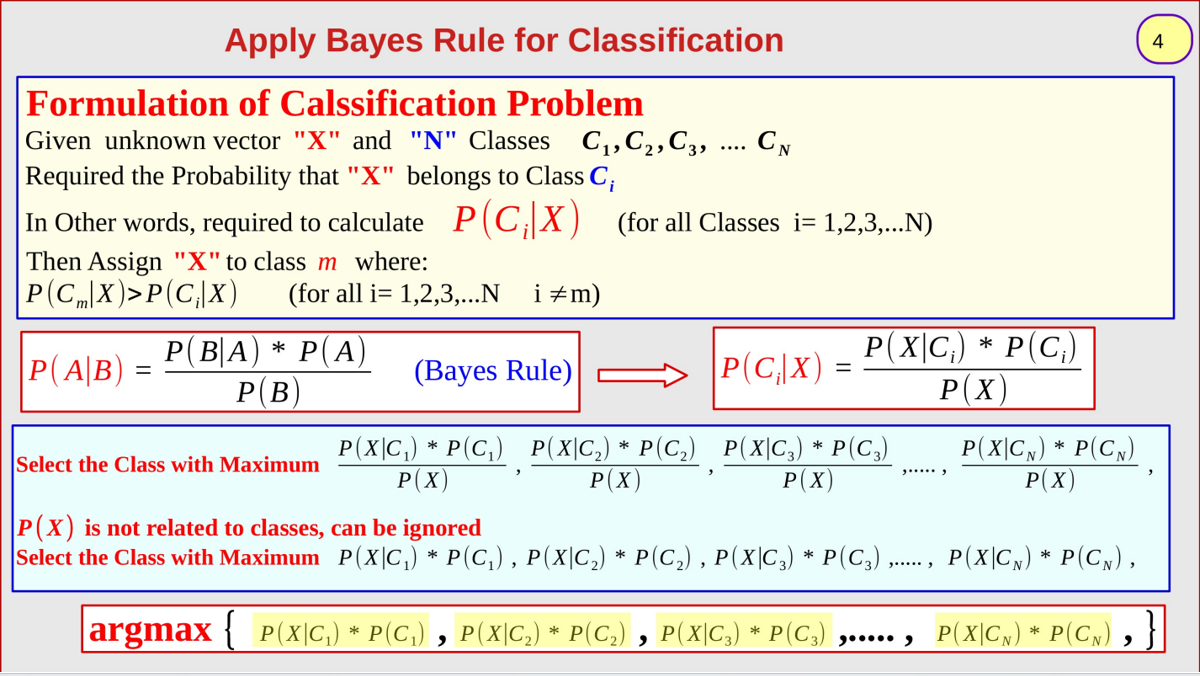

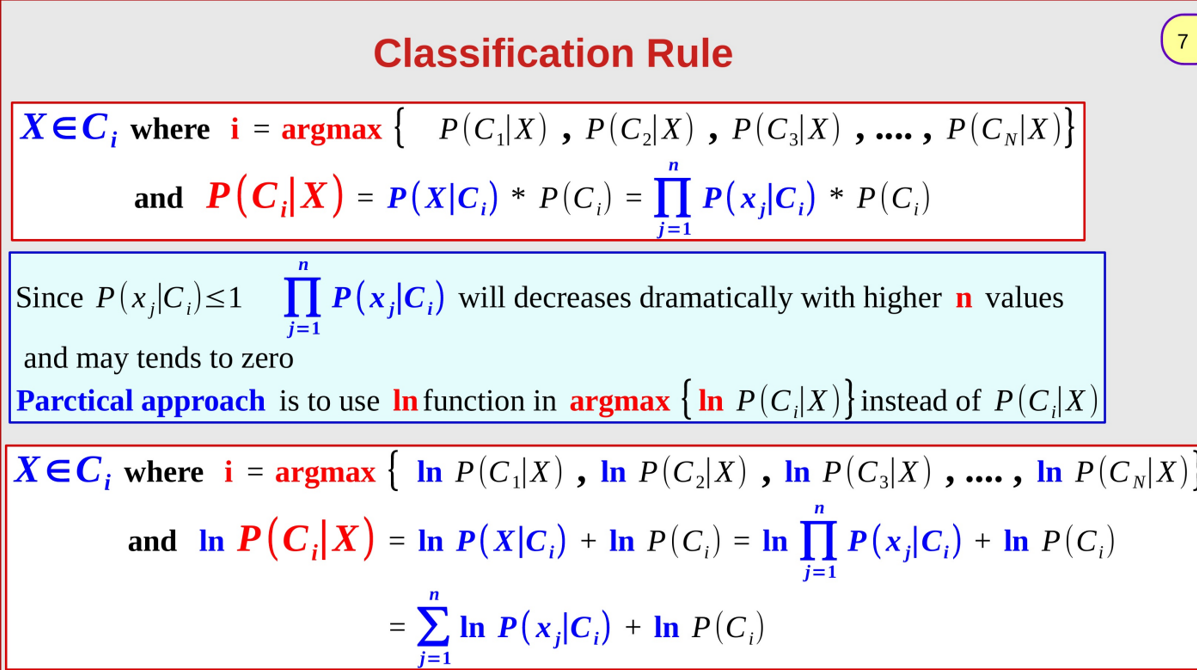

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn import datasets
from keras.datasets import mnist
import pandas as pd
import math
import itertools

In [ ]:
digits = datasets.load_digits()

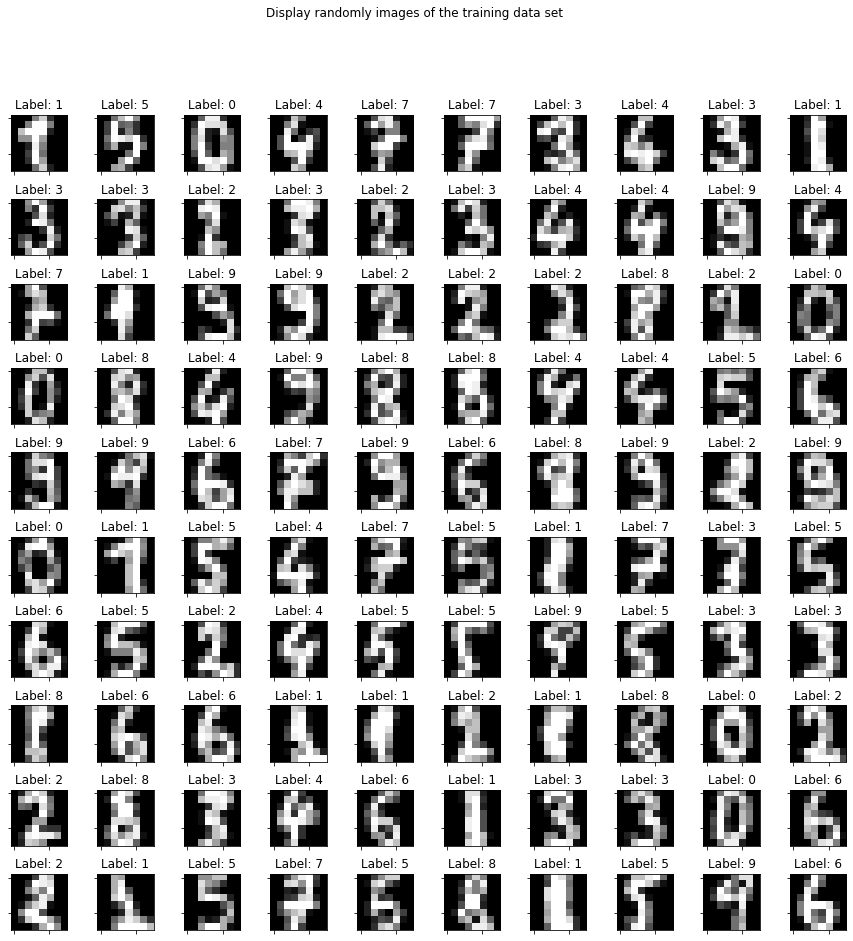

In [ ]:
# A helper display function

# check the reshape line, adjust it if needed for your image size
def displayData(X,Y):
    # set up array
    fig, ax = plt.subplots(nrows=10, ncols=10, figsize=(15,15))
    fig.suptitle( "Display randomly images of the training data set")
    # loop over randomly drawn numbers
    for i in range(10):
        for j in range(10):
            ind = np.random.randint(X.shape[0])
            tmp = X[ind,:].reshape(8,8)
            ax[i,j].set_title("Label: {}".format(Y[ind]))
            ax[i,j].imshow(tmp, cmap='gray') # display it as gray colors.
            plt.setp(ax[i,j].get_xticklabels(), visible=False)
            plt.setp(ax[i,j].get_yticklabels(), visible=False)

    fig.subplots_adjust(hspace=0.5, wspace=0.5)

displayData(digits.images,digits.target)

In [ ]:
print(np.shape(digits.images))
print(np.shape(digits.target))

(1797, 8, 8)
(1797,)


In [ ]:
numRows = digits.images.shape[0]
numCols = digits.images.shape[1]*digits.images.shape[2]
df = pd.DataFrame(index=range(numRows),columns=range(numCols))

In [ ]:
for i in range(digits.images.shape[0]):
  result = digits.images[i].flatten()
  for j in range(result.size):
    df.iat[i,j] = result[j]

In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [ ]:
x_train = df[:].iloc[0:1500]
x_test = df[:].iloc[1500:1797]

In [ ]:
df['target'] = digits.target
df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [ ]:
df.isna().sum().sum()

0

In [ ]:
y_train = df['target'].iloc[0:1500]
y_test = df['target'].iloc[1500:1797]

In [ ]:
x_train = x_train.to_numpy()
x_test = x_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

## Preparing the probabilities

## P(Cᵢ)

In [ ]:
total_counts = len(y_train)
counts = np.unique(y_train, return_counts=True)

In [ ]:
counts

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([151, 151, 150, 153, 148, 152, 151, 149, 146, 149]))

In [ ]:
classes_probabilities = counts[1]/total_counts

In [ ]:
classes_probabilities

array([0.10066667, 0.10066667, 0.1       , 0.102     , 0.09866667,
       0.10133333, 0.10066667, 0.09933333, 0.09733333, 0.09933333])

## Assumption: The classes are nearly equiprobable

## P(X|C)


In [ ]:
"""
Write Your Code here
P(X|C) = P(X1|C) * P(X2|C) * ... * P(Xn|C)
"""
P_X_C = 1
for i in classes_probabilities:
  P_X_C = i*P_X_C
print(P_X_C)

## P(C|X)

In [ ]:
"""
Write Your Code here
"""

## Test Your model

In [ ]:
"""
Write Your Code here
"""

## Use the following cell to evaluate your results and comment on them

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))